EDA(Exploratory Data Analysis)
------------------------------
- EDA of cleaned data
- Before Modelling we listen to data

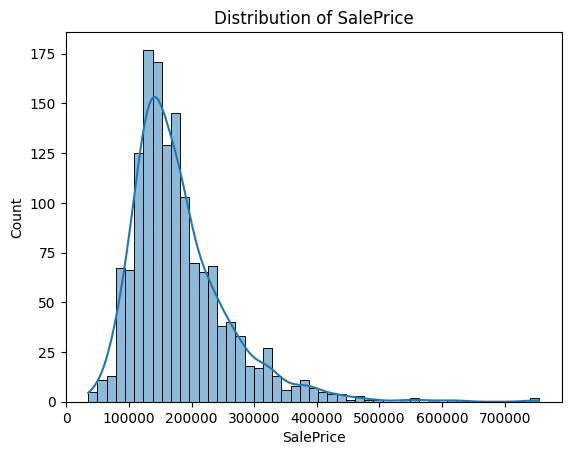

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import the cleaned training data
df = pd.read_csv('../data/processed/cleaned_train.csv')

#Plot the distribution of SalePrice
plt.figure()
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

Q1.Skewed?

Yes, right skewed.Meaning most houses are sold at lower prices, and fewer are sold at higher prices, which creates a long tail on the right side of the distribution.

Q2.Outliners?

General outliners are the high price houses.

Q3. Would a transformation help later?

Probably- to reduce skewedness to make the data more distributed.

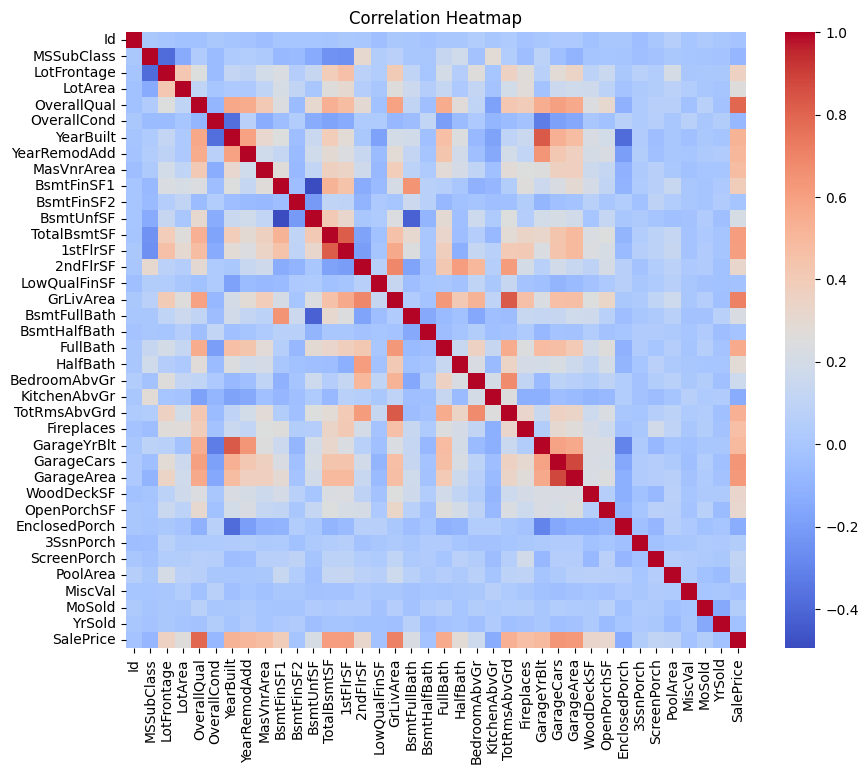

In [3]:
#Numerical feature correlation with SalePrice
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [4]:
#Top 10 features correlated with SalePrice
corr["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Q4.Which categories increase price?<br>
OverrallQual, GrLivArea, GarageCars, GarageArea, TotalbsmtSF, 1stFlrSF, FullBath among others(>0.55).

Q5.Are some categories noisy?<br>
Any groups whose correlevant values are less than 0.5 probably.

E.Q - Any suprising groups?<br>
Probably, 1stfloor and fullbath.


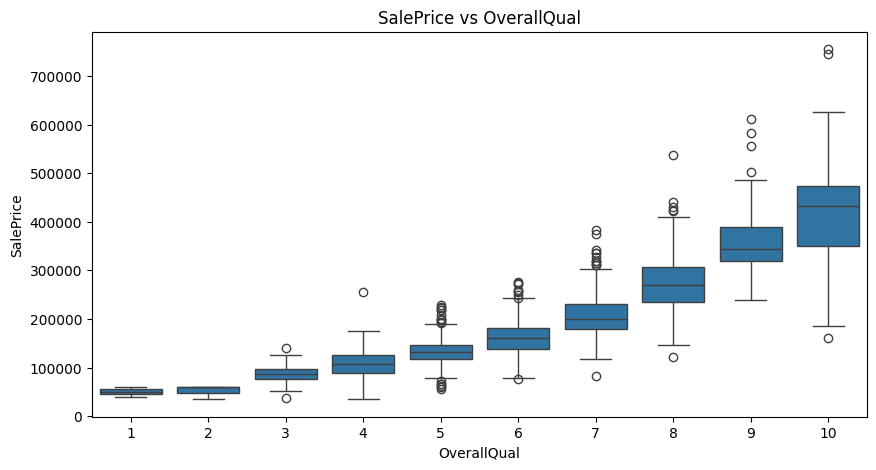

In [ ]:
# Outliners Visualization: Boxplot of SalePrice vs OverallQualty
plt.figure(figsize=(10, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("SalePrice vs OverallQual")
plt.show()


Q6. Which categories increase price?<br>
IDK

Q7. Are some categories noisy?<br>
IDK

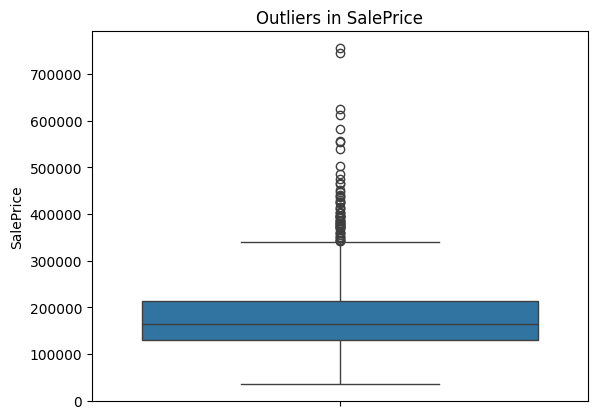

In [6]:
# Boxplot to visualize outliers in SalePrice
plt.figure()
sns.boxplot(y=df['SalePrice'])
plt.title("Outliers in SalePrice")
plt.show()

Q8.Do these outliers look valid?<br>
There are two extreme values(highest price) that are definitly valid(price>700000)

Q9.Would removing them help or hurt?<br>
It would help because it would lead to possible overfitting.

EDA SUMMARY
---------------
1. Sales Price is right-skewed. A log transformation may help modeling.
2. Overall quality greatly impacts sale price - Strongest predictor.
3. Size related features(basement, floor squarefeet) are highly correlated with price.
4. Luxury(high price) houses vary in price.
5. Removal of some Saleprice extreme values reduces overfitting of the proposed linear regression model.

Review Questions asked
----------------------
1. Why EDA?
>Models assume patterns from data they learn.<br>
>EDA checks those assumptions to make sure they're realistic - they avoid extreme data values(leads to overfitting)<br>
>This leads to better model performance.

2. Features for a Baseline Model?
- [OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath]
- Strong Correlation
- Easy explaination
- Low Engineering effort

3. Which Transformations help?<br>
Based on EDA:<br>
- log(SalePrice) → reduce skew
- Possibly log(GrLivArea)
- Scaling numerical features